# Student Habits vs Academic Performance

### 1. Primeiro contato com os dados

In [7]:
import pandas as pd
df = pd.read_csv('student_habits_performance.csv')
df.head(10)
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

### 2.  Hábitos e comportamento em números

<Axes: >

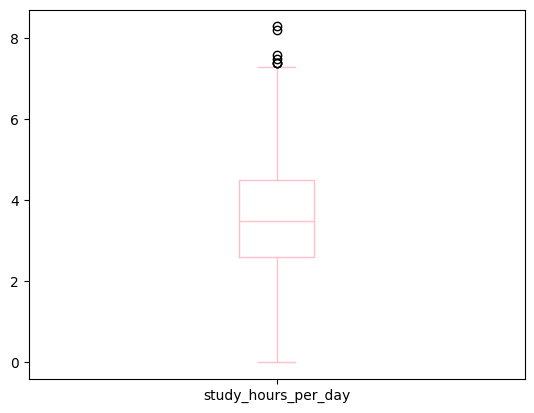

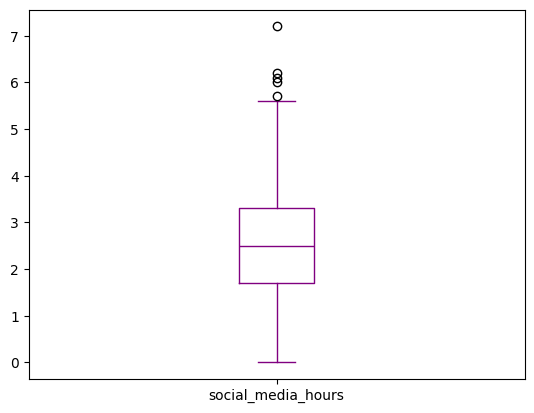

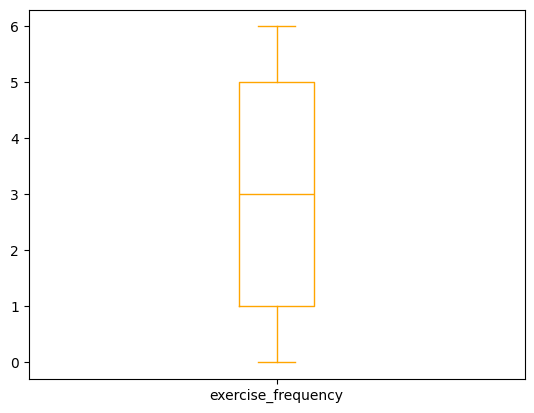

In [13]:
df.plot.box(y='study_hours_per_day', color='pink')
df.plot.box(y='social_media_hours', color='purple')
df.plot.box(y='exercise_frequency', color='orange')

Interprete com calma:

→ Tem outliers? Qual é a mediana?

→ Os dados são simétricos ou concentrados em um lado?

Você pode escolher 2 ou 3 variáveis e escrever algo como: “A maioria estuda cerca de X horas por dia, mas alguns poucos chegam a Y. Isso pode indicar ___.”

### 3. Como os comportamentos se distribuem?

<Axes: ylabel='Frequency'>

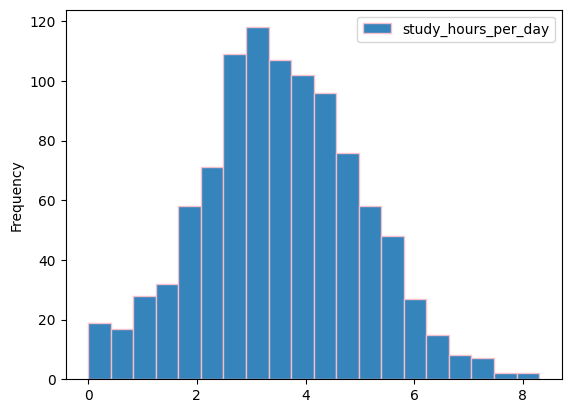

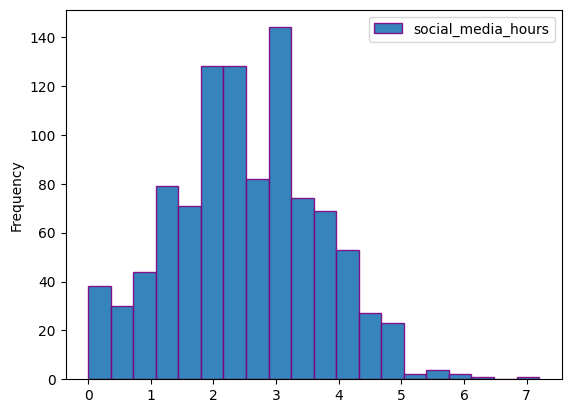

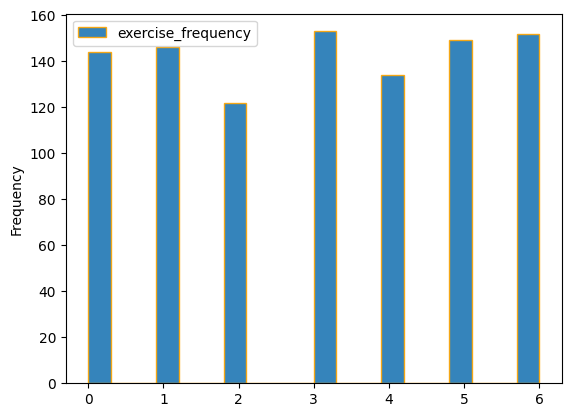

In [18]:
df.plot.hist(y='study_hours_per_day', bins=20, alpha=0.9, edgecolor='pink')
df.plot.hist(y='social_media_hours', bins=20, alpha=0.9, edgecolor='purple')
df.plot.hist(y='exercise_frequency', bins=20, alpha=0.9, edgecolor='orange')

<Axes: ylabel='Density'>

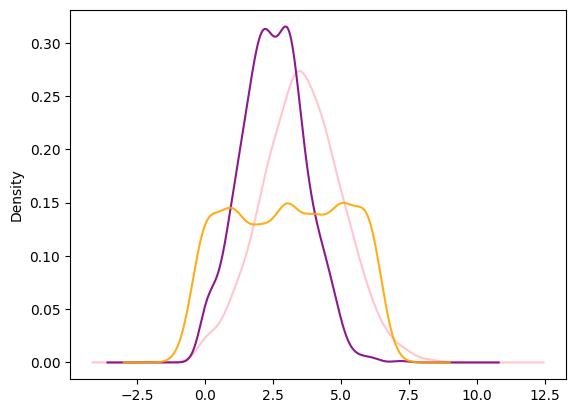

In [9]:
df['study_hours_per_day'].plot.kde(color='pink', label='study_hours_per_day', alpha=0.9)
df['social_media_hours'].plot.kde(color='purple', label='social_media_hours', alpha=0.9)
df['exercise_frequency'].plot.kde(color='orange', label='exercise_frequency', alpha=0.9)

### 4. Exploração

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

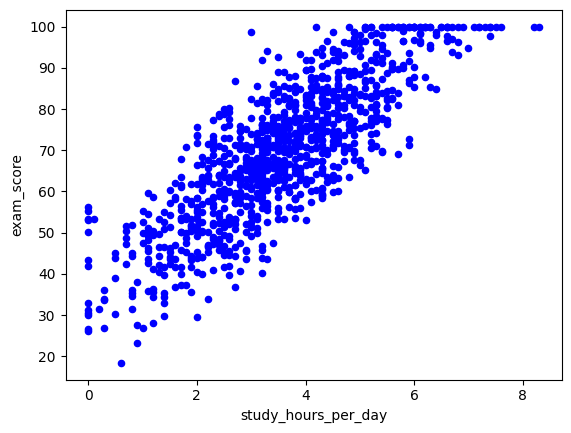

In [ ]:
from matplotlib.pyplot import plot
df.plot.scatter(x='study_hours_per_day', y='exam_score', color='blue')


### Hipótese livre